# Valuation project - Data Visualization and EDA project
- Valuation refers to calculation and determination of a company's value based on several assets of the company. 

- This project focuses on using pandas to clean and perform EDA processes on companies' valuation dataset

## import the necessary modules

In [54]:
# import the necessary modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from IPython.display import display, HTML
from collections import Counter

In [55]:
# read the dataset

df = pd.read_csv(r'unicorns till sep 2022.csv')


In [56]:
df.head(15)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
5,Checkout.com,$40,5/2/2019,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST..."
6,Instacart,$39,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
7,Databricks,$38,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates..."
8,Revolut,$33,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital"
9,Epic Games,$31.50,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures"


### Checking the dataset for nulls and errors

In [57]:
# drop the duplicates if any
df = df.drop_duplicates()

In [58]:
# let's check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [59]:
# just to check that all columns have equal number of entries.
df.describe()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
count,1186,1186,1186,1186,1186,1186,1168
unique,1183,222,695,48,286,34,1152
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,Sequoia Capital
freq,2,271,9,636,168,239,3


In [60]:
# checking for null values
df.isnull().sum()

Company            0
Valuation ($B)     0
Date Joined        0
Country            0
City               0
Industry           0
Investors         18
dtype: int64

## Data Cleaning


In [61]:
# Replace '/' to '-' in the Date joined Column
df['Date Joined'] = df['Date Joined'].str.replace('/','-')

# Change the Date column to datetype column
pd.to_datetime(df['Date Joined'])

0      2017-04-07
1      2012-12-01
2      2018-07-03
3      2014-01-23
4      2018-01-08
          ...    
1181   2022-06-21
1182   2022-06-21
1183   2022-07-05
1184   2022-07-12
1185   2022-07-27
Name: Date Joined, Length: 1186, dtype: datetime64[ns]

In [62]:
# remove the preceding '$' sign from the values
df['Valuation ($B)'] = df['Valuation ($B)'].str.replace('$','')

# change the datatype of valuation column into integer
df['Valuation ($B)'] = df['Valuation ($B)'].astype(float)

In [63]:
# I noticed that while checking for duplicate values for inddividual columns, the company name showed 3 duplicates. but no other column showed that error. let's check that out

df2 = df.set_index('Company')
df2.loc[['Bolt','Branch','Fabric']]
# So there are two companies with the same names. Glad i checked

,Valuation ($B),Date Joined,Country,City,Industry,Investors
Company,,,,,,
Bolt,11.00,10-8-2021,United States,San Francisco,Fintech,"Activant Capital, Tribe Capital, General Atlantic"
Bolt,8.40,5-29-2018,Estonia,Tallinn,Auto & transportation,"Didi Chuxing, Diamler, TMT Investments"
Branch,4.00,9-10-2018,United States,Redwood City,Mobile & telecommunications,"New Enterprise Associates, Pear, Cowboy Ventures"
Branch,1.05,3-1-2022,United States,Columbus,Fintech,"American Family Ventures, Greycroft, SignalFire"
Fabric,1.50,2-24-2022,United States,Bellevue,E-commerce & direct-to-consumer,"Redpoint Ventures, Norwest Venture Partners, S..."
Fabric,1.00,10-26-2021,United States,New York,"Supply chain, logistics, & delivery","Innovation Endeavors, Aleph, Temasek"


In [72]:
# checking other columns

df['Country'].sort_values().unique() # tested
df['Industry'].unique() # suspicious
# df['City\xa0'] # tested

array(['Artificial Intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech', 'Internet',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Partners, DST Global',
       'SingTel Innov8, Alpha JWC Ventures, G

In [73]:
# Some industries are enteres improperly into two industries

df['Industry'] = df['Industry'].str.replace('Artificial intelligence','Artificial Intelligence')
df['Industry'] = df['Industry'].str.replace('Internet software & services','Internet')

In [74]:

df['Company'] = df['Company'].astype(str)

#### Cleaning the error rows
I came to notice that for almost 18 of those null values we found in the investors column, the values are improperly entees. i mean
- the City values must be actuall null
- The investors value are entered into industry column
- The industry column is entered into the city column
- simply, the values are entered in their previous columns. We need to fix them

In [75]:
# Editing those rows directly in the df may affect the other columns, i dont want the risk.
# So i pulled out the defecto=ive rows and stored them in the 'error rows' df

error_rows = df[df['Investors'].isnull()]
error_rows

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
10,FTX,32.00,7-20-2021,Bahamas,Fintech,"Sequoia Capital, Thoma Bravo, Softbank",NaN
242,HyalRoute,3.50,5-26-2020,Singapore,Mobile & telecommunications,Kuang-Chi,NaN
316,Amber Group,3.00,6-21-2021,Hong Kong,Fintech,"Tiger Global Management, Tiger Brokers, DCM Ve...",NaN
346,Moglix,2.60,5-17-2021,Singapore,E-commerce & direct-to-consumer,"Jungle Ventures, Accel, Venture Highway",NaN
371,Coda Payments,2.50,4-15-2022,Singapore,Fintech,"GIC. Apis Partners, Insight Partners",NaN
482,Advance Intelligence Group,2.00,9-23-2021,Singapore,Artificial intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund",NaN
495,Trax,2.00,7-22-2019,Singapore,Artificial intelligence,"Hopu Investment Management, Boyu Capital, DC T...",NaN
865,Carousell,1.10,9-15-2021,Singapore,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent...",NaN
917,LinkSure Network,1.00,1-1-2015,China,Shanghai,Mobile & telecommunications,NaN
941,WeLab,1.00,11-8-2017,Hong Kong,Fintech,"Sequoia Capital China, ING, Alibaba Entreprene...",NaN


In [76]:
# Copying the investors value from the industry column
error_rows['Investors'] = error_rows['Industry']

C:\Users\sakir\AppData\Local\Temp\ipykernel_4300\1740860314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_rows['Investors'] = error_rows['Industry']


In [77]:
# I noted that one row had no investors and still had other values properly, 
# So, i changed the investors to null value wherever i find 'mobile & Commuication'
# I hope no other row had Mobile & communication in it

error_rows['Investors'] = error_rows['Investors'].replace('Mobile & telecommunications',np.nan)

C:\Users\sakir\AppData\Local\Temp\ipykernel_4300\3471563973.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_rows['Investors'] = error_rows['Investors'].replace('Mobile & telecommunications',np.nan)


In [78]:
# I also noted that the City column had an hidden name '\xa0' behind the scenes. Which was very annoying while filtering and selecting. So i fixed it
# i renamed the column on the error row df as well as the main df

error_rows = error_rows.rename(columns={'City\xa0':"City"})
df = df.rename(columns={'City\xa0':"City"})

In [79]:
# remove any other whitespaces in the titles
df['City'] =df['City'].str.strip()
df['Industry'] =df['Industry'].str.strip()
df['Country'] =df['Country'].str.strip()
df['Investors'] =df['Investors'].str.strip()
    

In [80]:
# Now to change the industry value from city column to the industry column
error_rows['Industry'] = error_rows['City']

In [81]:
# Remember that one proper column between the error rows, It was missing an industry. So i filled it

error_rows.loc[error_rows['Industry'] == 'Shanghai','Industry'] = 'Mobile & telecommunications'
error_rows


,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
10,FTX,32.00,7-20-2021,Bahamas,Fintech,Fintech,"Sequoia Capital, Thoma Bravo, Softbank"
242,HyalRoute,3.50,5-26-2020,Singapore,Mobile & telecommunications,Mobile & telecommunications,Kuang-Chi
316,Amber Group,3.00,6-21-2021,Hong Kong,Fintech,Fintech,"Tiger Global Management, Tiger Brokers, DCM Ve..."
346,Moglix,2.60,5-17-2021,Singapore,E-commerce & direct-to-consumer,E-commerce & direct-to-consumer,"Jungle Ventures, Accel, Venture Highway"
371,Coda Payments,2.50,4-15-2022,Singapore,Fintech,Fintech,"GIC. Apis Partners, Insight Partners"
482,Advance Intelligence Group,2.00,9-23-2021,Singapore,Artificial intelligence,Artificial intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund"
495,Trax,2.00,7-22-2019,Singapore,Artificial intelligence,Artificial intelligence,"Hopu Investment Management, Boyu Capital, DC T..."
865,Carousell,1.10,9-15-2021,Singapore,E-commerce & direct-to-consumer,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent..."
917,LinkSure Network,1.00,1-1-2015,China,Shanghai,Mobile & telecommunications,NaN
941,WeLab,1.00,11-8-2017,Hong Kong,Fintech,Fintech,"Sequoia Capital China, ING, Alibaba Entreprene..."


In [82]:
# fill the undefined values 
df.fillna('Not defined',inplace=True)

In [83]:
df.isnull().sum() # No nulls found!

Company           0
Valuation ($B)    0
Date Joined       0
Country           0
City              0
Industry          0
Investors         0
dtype: int64

In [84]:
"""To replace the cleaned data into the original df, we take the 
indices of the error rows df and save them on a separate variable"""
indices = error_rows.index

# this is where we replace the cleaned rows into the dataset
df.loc[indices] = error_rows

In [85]:
# Export the dataset to a csv file 
df.to_csv('countries valuation dataset.csv')    

#### Classification of companies based on countries and cities

In [86]:
# display(df.set_index(['Country','City']).sort_index())
scrollable_style = """
<div style="max-height: 400px; overflow-y: scroll; border: 1px white; padding: 10px;">
{table}
</div>
"""

# Use pandas to convert the dataframe to an HTML table
html_table = df.set_index(['Country','City']).sort_index().to_html()

# Wrap the table inside the scrollable div
HTML(scrollable_style.format(table = html_table))

In [87]:
# export the dataframe into excel file

origin_countries = df.set_index(['Country','City']).sort_index()
origin_countries.to_excel('Country-wise grouped database.xlsx')

## Data Visualization

#### Top 10 valuable companies 

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,140.0,4-7-2017,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127.0,12-1-2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,7-3-2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,1-23-2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40.0,1-8-2018,Australia,Surry Hills,Internet,"Sequoia Capital China, Blackbird Ventures, Mat..."
5,Checkout.com,40.0,5-2-2019,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST..."
6,Instacart,39.0,12-30-2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
7,Databricks,38.0,2-5-2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates..."
8,Revolut,33.0,4-26-2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital"
10,FTX,32.0,7-20-2021,Bahamas,Fintech,Fintech,"Sequoia Capital, Thoma Bravo, Softbank"


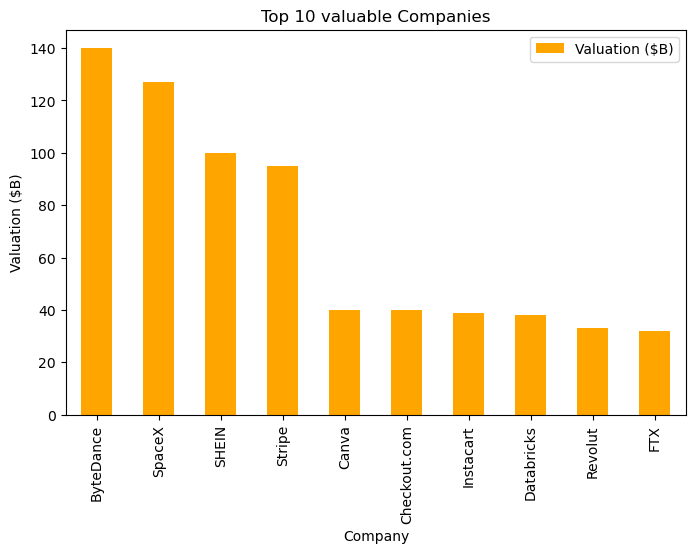

In [88]:
# getting the top 10 companies and plitting them in a bar chart

companies_top = df.sort_values(by='Valuation ($B)',ascending=False).head(10)
companies_top.plot.bar(
    figsize = (8,5),
    x= 'Company',
    y='Valuation ($B)',
    xlabel= 'Company',
    ylabel='Valuation ($B)',
    title= 'Top 10 valuable Companies',
    color = 'orange',
    )
companies_top

#### Countries with the highest investments

,Valuation ($B)
Country,
United States,2069.89
China,678.59
United Kingdom,205.45
India,202.92
Germany,80.88
France,58.42
Australia,54.40
Canada,49.23
Israel,48.02


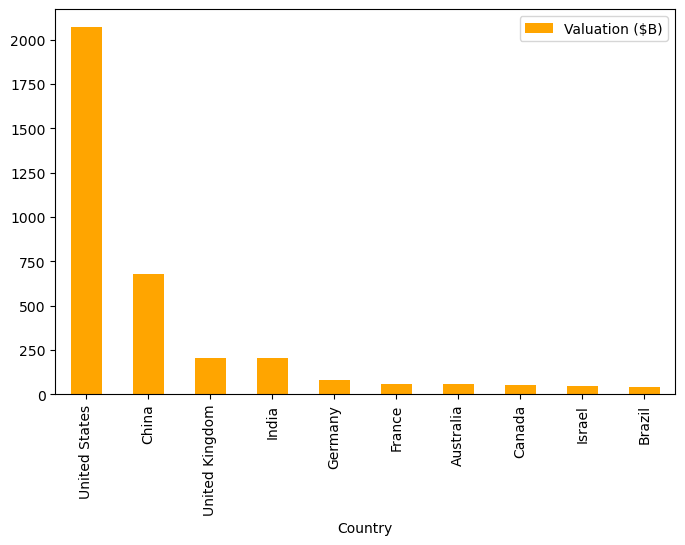

In [89]:
country_top = df.groupby(by='Country').sum(numeric_only= True).sort_values(by='Valuation ($B)',ascending=False).head(10)
country_top.plot.bar(
    figsize= (8,5),
    y='Valuation ($B)',
    label = 'Valuation ($B)',
    color = 'orange'
    )
country_top

#### Industries with the highest investments

,Valuation ($B)
Industry,
Fintech,896.98
Internet,664.06
E-commerce & direct-to-consumer,392.89
Artificial Intelligence,330.17
Other,293.72
Health,233.16
"Supply chain, logistics, & delivery",212.47
Cybersecurity,147.00
Data management & analytics,141.79


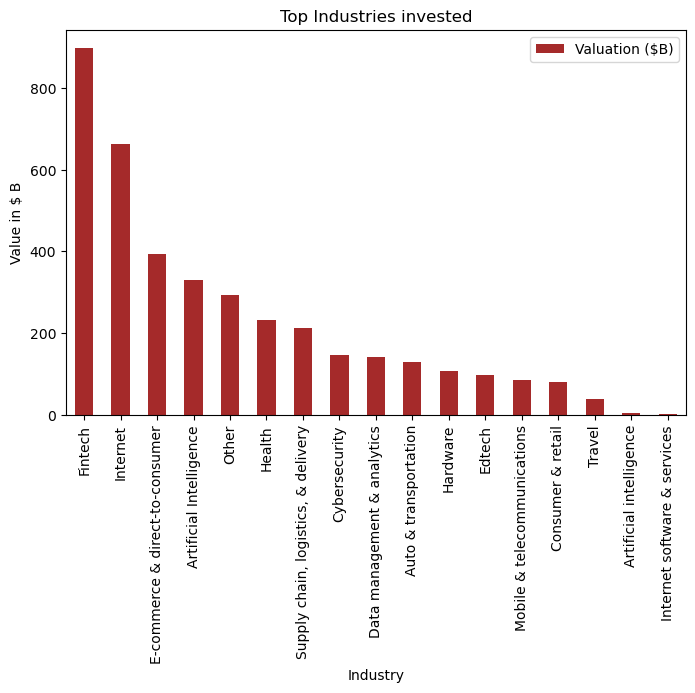

In [90]:
# get the largest invested industries by grouping their investments together

biggest_industries = df.groupby(by='Industry').sum(numeric_only=True).sort_values(by='Valuation ($B)',ascending=False)
biggest_industries.plot.bar(
    figsize = (8,5),
    y = 'Valuation ($B)',
    xlabel = 'Industry',
    ylabel = 'Value in $ B',
    title = 'Top Industries invested',
    color = 'brown'
)
biggest_industries

#### Top investor (Based on no. of investments)

This data was pretty tricky. the investors were all entered as a list and i noticed that the investors are repeating. 
- Hence i have to do a little bit extra work to extract the information.
- Please do let me know if i am doing it the long way

In [91]:
# first making sure that no columns has NaN in it
df['Investors'].fillna('Not available',inplace=True)

C:\Users\sakir\AppData\Local\Temp\ipykernel_4300\1843419157.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Investors'].fillna('Not available',inplace=True)


In [92]:
# this is just for searching purposes

# df[df['Investors'].str.contains('Sequoia Capital China')]

# Program to gather all the unique investors on the database
Investors = set()
for i in list(df['Investors'].str.split(',')): # This splits the series in the individual rows and stores it in list
    for j in i: # i is a series containing the list of all the investors of all each company, j is a single list inside i.
        Investors.add(j.strip())
Investors = list(Investors)

1358

In [93]:
# convert the investors series into a list for getting more features

investments = list(df['Investors'])
investments

['Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group',
 'Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures',
 'Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners',
 'Khosla Ventures, LowercaseCapital, capitalG',
 'Sequoia Capital China, Blackbird Ventures, Matrix Partners',
 'Tiger Global Management, Insight Partners, DST Global',
 'Khosla Ventures, Kleiner Perkins Caufield & Byers, Collaborative Fund',
 'Andreessen Horowitz, New Enterprise Associates, Battery Ventures',
 'index Ventures, DST Global, Ribbit Capital',
 'Tencent Holdings, KKR, Smash Ventures',
 'Sequoia Capital, Thoma Bravo, Softbank',
 'SoftBank Group, Andreessen Horowitz, Temasek Holdings',
 'Forerunner Ventures, Crosslink Capital, Homebrew',
 'Tencent Holdings, Lightspeed India Partners, Sequoia Capital India',
 'GGV Capital, ZhenFund, Tencent',
 'Hillhouse Capital Management, Boyu Capital, Sequoia Capital China',
 'Accel, AltaIR Capital, Technology Crossover Ventur

In [94]:
# Program to check how many times a particular investor has invested
# we use the investors list that we created to check each company's investors

investment_count = {} # it will be a dict with investor name as key and their no of investments as the value
for investor in Investors:
    investor_count = 0 # this keeps the count of investor
    for investment in investments:
        if investor in investment:
            investor_count = investor_count + 1
        investment_count[investor] = investor_count


In [95]:
# get two separate list of investors and their no_of_investments from the dict.

investor = investment_count.keys()
no_of_investments = investment_count.values()

In [96]:
# Create a separate dataframe for the collected values
investor_df = pd.DataFrame({'Investors':Investors,'Total Investments':no_of_investments})

# drop the blank value in the table
investor_df = investor_df.drop(index=0)

,Investors,Total Investments
1198,Sequoia Capital,130
737,Accel,71
956,Tiger Global,61
1009,Andreessen Horowitz,60
230,Tiger Global Management,57
95,Insight Partners,56
1126,Sequoia Capital China,49
670,General Catalyst,44
327,Lightspeed Venture Partners,40
132,Tencent,39


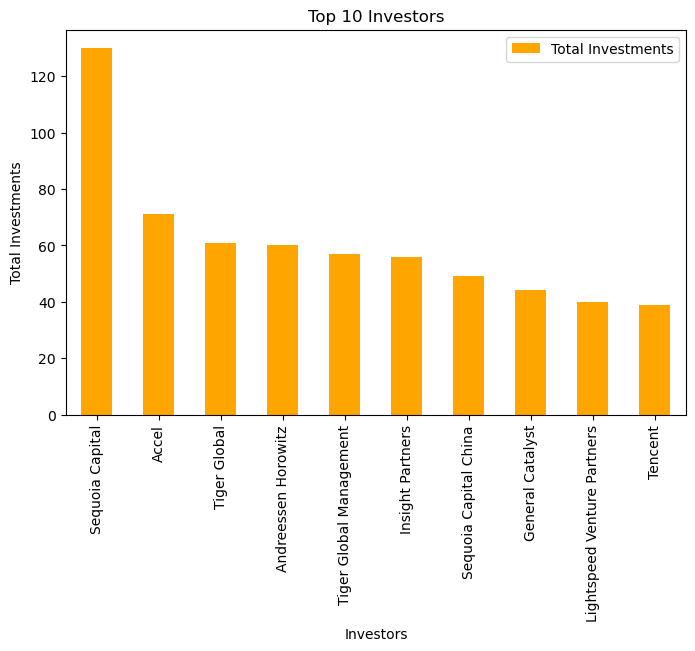

In [97]:
# print the investing companies sorted by the top investor

top_investors = investor_df.sort_values(by='Total Investments',ascending=False).head(10)
top_investors.plot.bar(
    figsize = (8,5),
    x = 'Investors',
    y = 'Total Investments',
    xlabel = 'Investors',
    ylabel = 'Total Investments',
    title = 'Top 10 Investors',
    color = 'orange'
)
top_investors


#### Investments of every Investor
- To find the investment made by every investor, we make use of the investors list which we already processed. 
- We then loop through the list and for each investor, we must find all the rows that has the investor's name in it
- Then we store them in a separate dictionary
- We create a dataframe with the information extracted.

In [98]:
# Creating the function to find all the companies of a given investor

def investor_company_finder(investor):
    inv_company = {}
    companies = []
    for index, inv_list in df['Investors'].items():
        if investor in inv_list:
            companies.append(df.loc[index,'Company'])
    inv_company[investor] = companies
    return inv_company

# investor_company_finder('Sequoia Capital')

In [99]:
# create an empty dictionary and store all the investors as keys and all their respective investments as a list of values

inv_companies = {}
for i in Investors[1:]: # we lwave the first one because its a blank
    
    # for each name in investor list, call the function that we created before
    inv_company_set = investor_company_finder(i)

    # from the inv_company_set dictionary, extract the keys and values onto a separate list
    investor = [key for key,value in inv_company_set.items()]
    companies = [value for key, value in inv_company_set.items()]
    inv_companies[i] = companies

In [100]:
# Create a dataframe for investors and companies alone
investors_df = pd.DataFrame({'Investor':inv_companies.keys(),'Company':inv_companies.values()}).explode('Company')
# simple debugging
investors_df['Company'] = investors_df['Company'].apply(lambda x: x if isinstance(x,list) else [])
# Expand the dataframe so that every company sits on its separate row and fill the investor name for respective companies
investors_df = investors_df.explode('Company').set_index(['Investor','Company']).sort_index()
# Export the dataframe into an excel file for further processing (if any)
investors_df.to_excel('investors and companies list.xlsx')

In [101]:
# display(df.set_index(['Country','City']).sort_index())
scrollable_style = """
<div style="max-height: 400px; overflow-y: scroll; border: 1px white; padding: 10px;">
{table}
</div>
"""

# Use pandas to convert the dataframe to an HTML table
html_table = investors_df.to_html()

# Wrap the table inside the scrollable div
HTML(scrollable_style.format(table = html_table))

### Thank You
